# Predicting Price of Used Cars from Cardekho by Amarendra Pratap Deo

## Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Importing Data

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/amarendradeo/Used-Car-Price-Prediction-Using-Multiple-Linear-Regression/8c30d3d0ed41decf6379f3e212b4ce9825e827de/cardekho_pre.csv')

In [3]:
data.head(3)

,id,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.0,1197,80.0,5,215000


## Data Summary 

### Checking for NA

In [4]:
print(data.isna().sum())

id                   0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19542 entries, 0 to 19541
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 19542 non-null  int64  
 1   car_name           19542 non-null  object 
 2   brand              19542 non-null  object 
 3   model              19542 non-null  object 
 4   vehicle_age        19542 non-null  int64  
 5   km_driven          19542 non-null  int64  
 6   seller_type        19542 non-null  object 
 7   fuel_type          19542 non-null  object 
 8   transmission_type  19542 non-null  object 
 9   mileage            19542 non-null  float64
 10  engine             19542 non-null  int64  
 11  max_power          19542 non-null  float64
 12  seats              19542 non-null  int64  
 13  selling_price      19542 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 2.1+ MB


## Exploratory Data Analysis

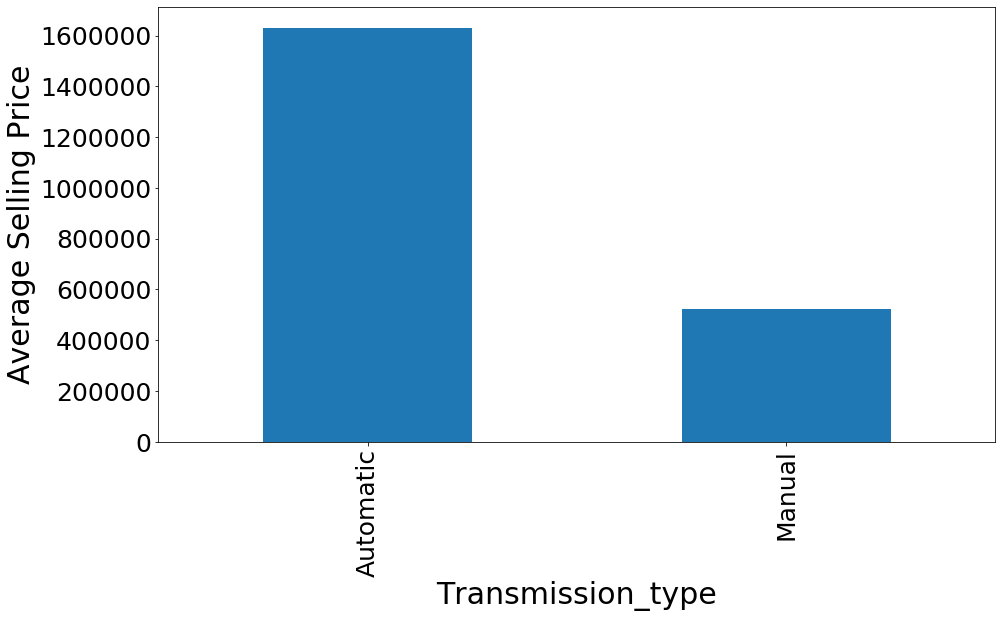

In [6]:
# Transmission Type and Selling Price
plt.figure(figsize=(15,8))
data.groupby(['transmission_type'])['selling_price'].mean().plot.bar()
plt.xlabel("Transmission_type",size=30)
plt.ylabel("Average Selling Price",size=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

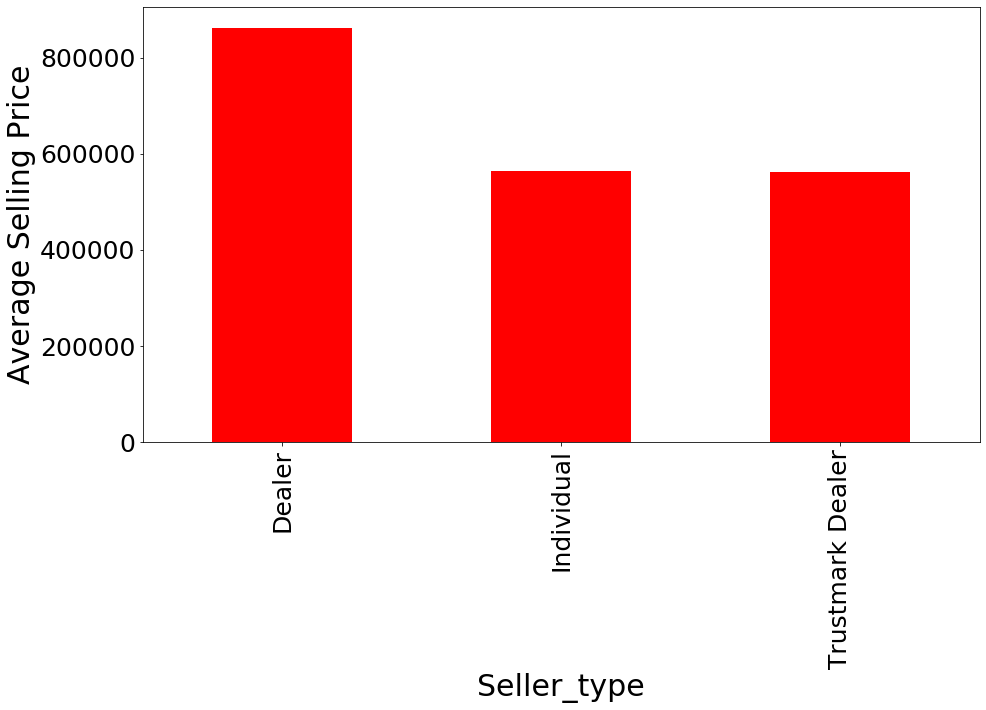

In [7]:
#Seller Type and Selling Price
plt.figure(figsize=(15,8))
data.groupby(['seller_type'])['selling_price'].mean().plot.bar(color='red')
plt.xlabel("Seller_type",size=30)
plt.ylabel("Average Selling Price", size=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

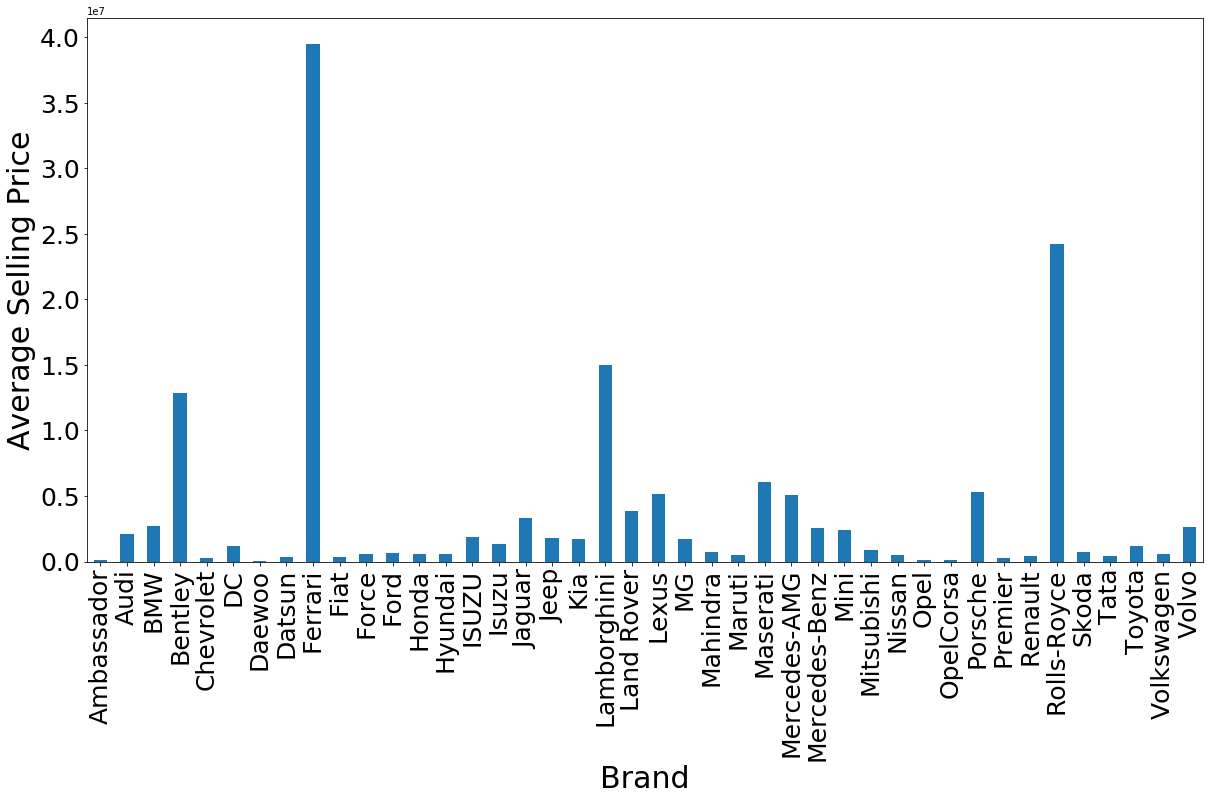

In [8]:
# Brand and Selling Price
plt.figure(figsize=(20,10))
data.groupby(['brand'])['selling_price'].mean().plot.bar()
plt.xlabel("Brand", size=30)
plt.ylabel("Average Selling Price",size=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

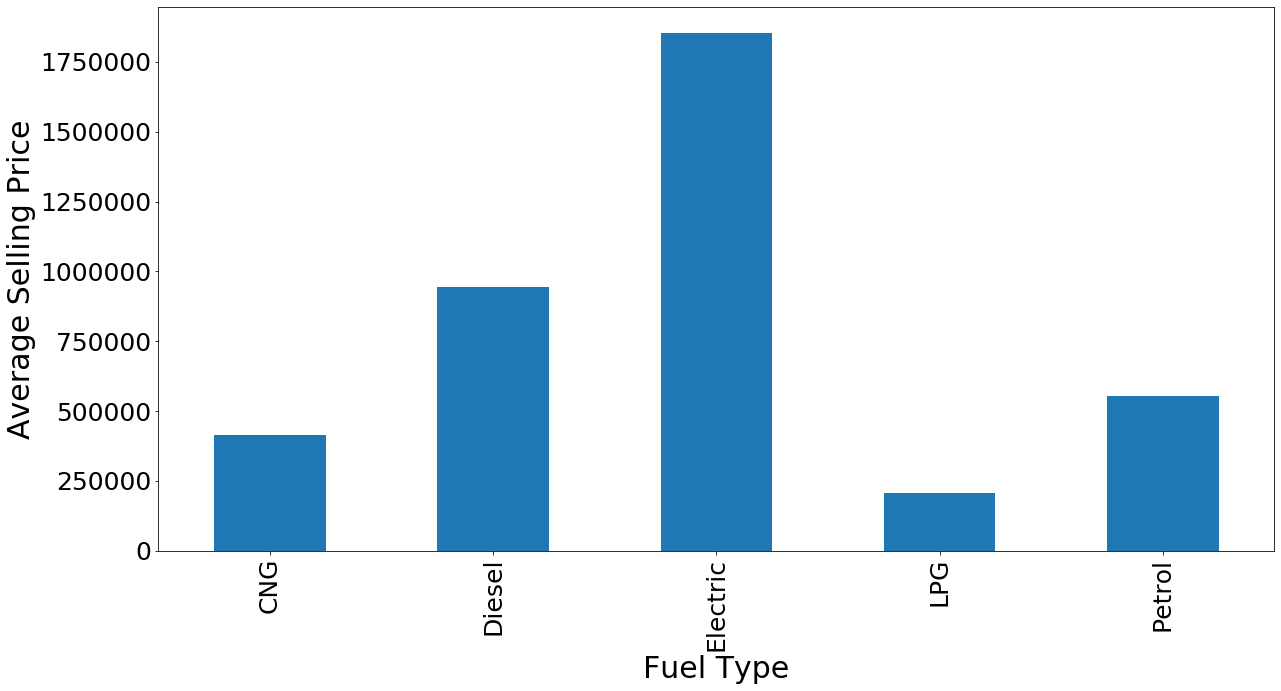

In [9]:
# Fuel Type and Selling Price
plt.figure(figsize=(20,10))
data.groupby(['fuel_type'])['selling_price'].mean().plot.bar()
plt.xlabel("Fuel Type", size=30)
plt.ylabel("Average Selling Price",size=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

<Figure size 720x3600 with 0 Axes>

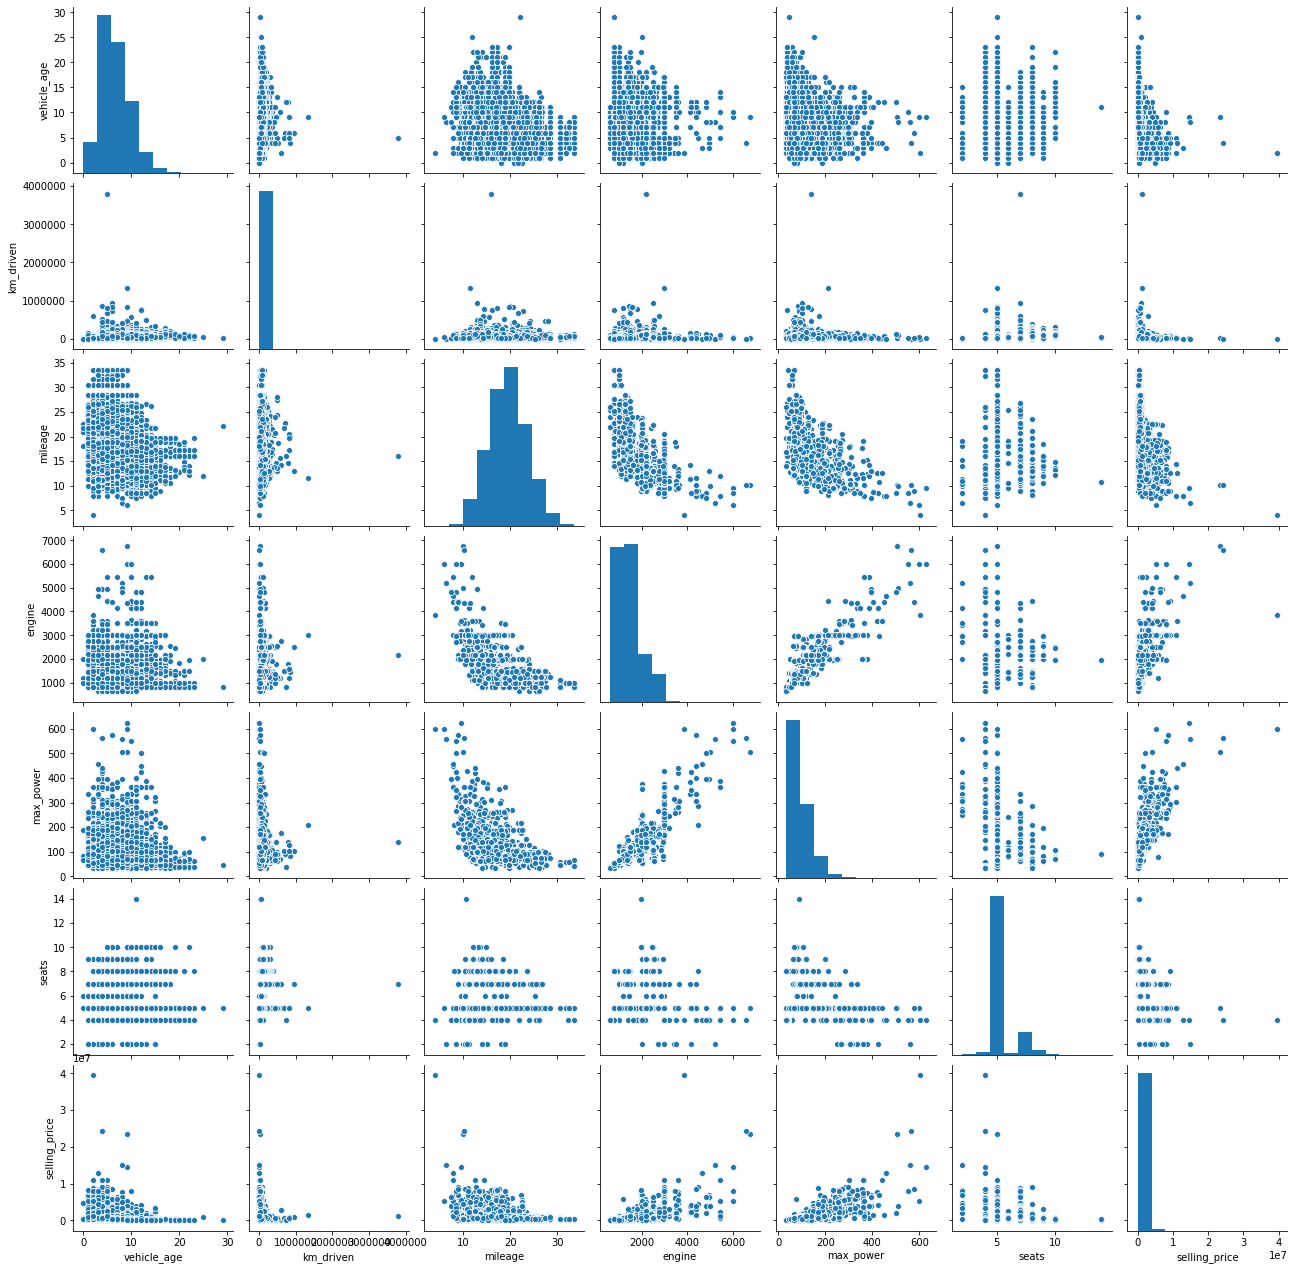

In [12]:
# Pairplot to explore the relationship of numerical variables with Selling Price of Car
plt.figure(figsize=(10,50))
data_without_id=data.drop('id', axis=1)
sns.pairplot(data_without_id)
plt.show()

#### The above pairplot graph represents the relationship of the independent variables with the dependent variable (selling price)

### Corelation Matrix

In [ ]:
data_without_id.corr()

In [ ]:
corr = data_without_id.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("sample.jpg", dpi=200)
#Reference seaborn documentation

## Outlier Detection and Removal

In [ ]:
# Data Summary of the data, here the include all keyword will give the summary of all the columns
data.describe(include='all')

#### The standard deviation in the case of Kilometer Driven is around 50500 KM, the standard deviation of the selling price is around INR 9,00,000 both standard deviations are high indicating outliers

In [ ]:
#Plotting the box plot for the Kilometers Driven and the Selling Price
plt.figure(figsize=(20,10))
sns.boxplot(data['km_driven'])

#### The above boxplot clearly shows that there are outliers in the Kilometers driven column

In [ ]:
#PLotting the box plot for the Kilometers Driven and the Selling Price
plt.figure(figsize=(20,10))
sns.boxplot(data['selling_price'])

#### The above boxplot clearly shows that there are outliers in the selling price column

### Removing Outliers using IQR

In [ ]:
#Removing Outliers of Selling Price and Kilometers Driven
z=data['selling_price']
Q1 =  z.quantile(0.25)
Q3 =  z.quantile(0.75)
IQR = Q3 - Q1
up_b=Q3 + (0.5 * IQR)
l_b=Q1 - (0.5 * IQR)

outliers=((z < l_b) | (z > up_b))
np.unique(outliers,return_counts=True)

There are 3472 Outliers that are detected and removed from the selling price column

In [ ]:
data_w_o=data[~outliers]

In [ ]:
#Removing Outliers of Kilometers Driven
y=data_w_o['km_driven']
Q1 =  y.quantile(0.25)
Q3 =  y.quantile(0.75)
IQR = Q3 - Q1
up_b=Q3 + (0.5 * IQR)
l_b=Q1 - (0.5 * IQR)

outliers_km=((y < l_b) | (y > up_b))
np.unique(outliers_km,return_counts=True)

There are 2804 Outliers that are detected and removed from the kilometer driven column

In [ ]:
data_w_o=data_w_o[~outliers_km]

In [ ]:
data_w_o.describe()

The standard deviation of KM driven and Selling Price has reduced significntly, now since the outlier are removed we can apply the Regression Model

In [ ]:
#Plotting the box plot for the Kilometers Driven and the Selling Price after removing Outliers
plt.figure(figsize=(20,10))
sns.boxplot(data_w_o['km_driven'])

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data_w_o['selling_price'])

## Converting Categorical Values to Numerical Values using one Hot encoding

In [ ]:
data_w_o=pd.get_dummies(data_w_o, columns=['brand','seller_type','model', 'fuel_type','transmission_type'],drop_first=True)
data_w_o.head(3)

### Dividing the Data into X(predictor variables) and y(target variable)

In [ ]:
data_w_o=data_w_o.reset_index(drop=True)
#drop parameter to avoid the old index being added as a column:
data_w_o.head(2)

In [ ]:
X=data_w_o.drop(['id','car_name','selling_price'], axis=1)
y=data_w_o['selling_price']

### Spliting the data into Train set and Test Set in the ration of 70:30

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

### Importing LinearRegression Model from Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

### Applying the linear Regression on the X_train and y_train dataset

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
mean_absolute_error(y_test,y_pred).round()

### The mean absolute Error of the Model is INR 65456

In [ ]:
r2_score(y_test,y_pred).round(2)

### The R^2 value of the Model is 0.84 meaning 84% of the Variation in the selling price is explained by the model

In [ ]:
plt.figure(figsize=(40,20))
sns.scatterplot(x=y_test.index, y=y_test)
sns.scatterplot(x=y_test.index, y=y_pred)
plt.xlabel("Index",size=30)
plt.ylabel("Selling Price",size=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(("Actual", "Predicted"),loc=3, fontsize='xx-large')
plt.savefig("result.jpg", dpi=150)
plt.show()


In [ ]:
y_pred_X=lr.predict(X)

In [ ]:
X['Y_Pred']=y_pred_X
X['Selling_Price']=data_w_o['selling_price']

In [ ]:
X['Percentage_Error']=((abs(X.Selling_Price-X.Y_Pred))/(X.Selling_Price))*100

In [ ]:
percentage_error=X.Percentage_Error.sum()/(len(X.Percentage_Error)+1)
percentage_error.round()

### The Percentage Error calculated for the model is 16%

In [ ]:
plt.figure(figsize=(30,20))
sns.scatterplot(x=X.index, y=X.Selling_Price)
sns.scatterplot(x=X.index, y=X.Y_Pred)
plt.xlabel("Index",size=30)
plt.ylabel("Selling Price",size=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(("Actual", "Predicted"),loc=3, fontsize='xx-large')
plt.show()